In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel("/Users/stevenmacauda/Downloads/Sample - Superstore.xls")

In [3]:
technology = df.loc[df['Category'] == 'Technology']
office = df.loc[df['Category'] == 'Office Supplies']
furniture = df.loc[df['Category'] == 'Furniture']

In [4]:
technology.shape, office.shape, furniture.shape

((1847, 21), (6026, 21), (2121, 21))

In [5]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
technology.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture.drop(cols, axis=1, inplace=True)

technology = technology.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.sort_values('Order Date')

technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
technology = technology.set_index('Order Date')
office = office.set_index('Order Date')
furniture = furniture.set_index('Order Date')

y_technology = technology['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
y_furniture = furniture['Sales'].resample('MS').mean()

technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales':y_technology.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})
furniture = pd.DataFrame({'Order Date': y_furniture.index, 'Sales': y_furniture.values})

store = technology.merge(office, how='inner', on='Order Date')
store = store.merge(furniture, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales', 'Sales_y': 'office_sales', 'Sales': 'furniture_sales'}, inplace=True)
store.head()

,Order Date,technology_sales,office_sales,furniture_sales
0,2014-01-01,449.041429,285.357647,480.194231
1,2014-02-01,229.787143,63.042588,367.931600
2,2014-03-01,2031.948375,391.176318,857.291529
3,2014-04-01,613.028933,464.794750,567.488357
4,2014-05-01,564.698588,324.346545,432.049188


In [7]:
from prophet import Prophet

technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width=0.95)
technology_model.fit(technology)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.



Initial log joint probability = -59.7409
Iteration  1. Log joint probability =    36.0894. Improved by 95.8303.
Iteration  2. Log joint probability =    50.2517. Improved by 14.1624.
Iteration  3. Log joint probability =    65.8778. Improved by 15.626.
Iteration  4. Log joint probability =    70.0617. Improved by 4.18397.
Iteration  5. Log joint probability =    70.6171. Improved by 0.555431.
Iteration  6. Log joint probability =    70.6503. Improved by 0.0331714.
Iteration  7. Log joint probability =    71.1781. Improved by 0.527814.
Iteration  8. Log joint probability =    71.2536. Improved by 0.0754692.
Iteration  9. Log joint probability =    71.2586. Improved by 0.00494821.
Iteration 10. Log joint probability =    71.2967. Improved by 0.0381678.
Iteration 11. Log joint probability =    71.3033. Improved by 0.00654426.
Iteration 12. Log joint probability =    71.3325. Improved by 0.0291994.
Iteration 13. Log joint probability =    71.3409. Improved by 0.00846069.
Iteration 14. Log

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 Log joint probability =     71.352. Improved by 5.397e-07.
Iteration 29. Log joint probability =     71.352. Improved by 2.97809e-06.
Iteration 30. Log joint probability =     71.352. Improved by 1.06851e-05.
Iteration 31. Log joint probability =     71.352. Improved by 5.75021e-06.
Iteration 32. Log joint probability =     71.352. Improved by 2.60287e-06.
Iteration 33. Log joint probability =     71.352. Improved by 5.30548e-10.

Initial log joint probability = -59.2582
Iteration  1. Log joint probability =    38.6371. Improved by 97.8953.
Iteration  2. Log joint probability =    65.5131. Improved by 26.876.
Iteration  3. Log joint probability =    79.6826. Improved by 14.1695.
Iteration  4. Log joint probability =    79.7921. Improved by 0.109445.
Iteration  5. Log joint probability =    79.8485. Improved by 0.0564444.
Iteration  6. Log joint probability =    79.9048. Improved by 0.0562415.
Iteration  7. Log joint probability =     79.915. Improved by 0.0102011.
Iteration  8. Log jo

nt probability =    80.0892. Improved by 1.07747e-08.
Iteration 76. Log joint probability =    80.0892. Improved by 4.23736e-09.

Initial log joint probability = -59.4782
Iteration  1. Log joint probability =    32.1963. Improved by 91.6745.
Iteration  2. Log joint probability =    66.4876. Improved by 34.2913.
Iteration  3. Log joint probability =    91.4725. Improved by 24.9849.
Iteration  4. Log joint probability =    97.1278. Improved by 5.65524.
Iteration  5. Log joint probability =     97.227. Improved by 0.099276.
Iteration  6. Log joint probability =    97.2722. Improved by 0.0451306.
Iteration  7. Log joint probability =    97.2786. Improved by 0.0064387.
Iteration  8. Log joint probability =    97.2875. Improved by 0.00892092.
Iteration  9. Log joint probability =    97.2913. Improved by 0.0037551.
Iteration 10. Log joint probability =    97.2951. Improved by 0.00385468.
Iteration 11. Log joint probability =    97.2963. Improved by 0.00112628.
Iteration 12. Log joint probabil

In [8]:
technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

<Figure size 1296x432 with 0 Axes>

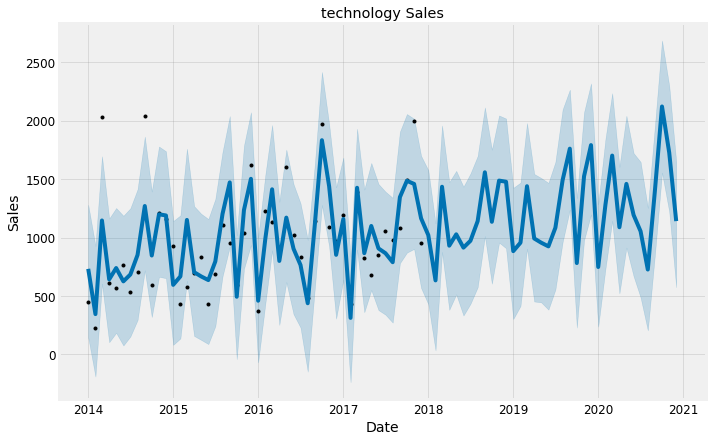

In [9]:
plt.figure(figsize=(18, 6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('technology Sales');

<Figure size 1296x432 with 0 Axes>

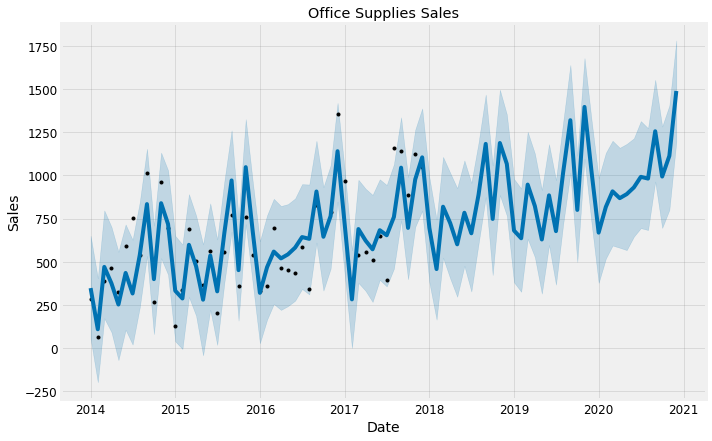

In [10]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

<Figure size 1296x432 with 0 Axes>

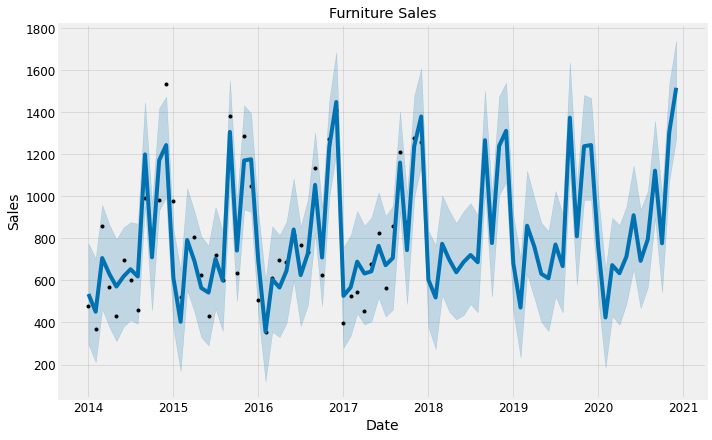

In [11]:
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

In [12]:
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]

merge_technology_forecast = technology_forecast.copy()
merge_office_forecast = office_forecast.copy()
merge_furniture_forecast = furniture_forecast.copy()

merge_technology_forecast.columns = technology_names
merge_office_forecast.columns = office_names
merge_furniture_forecast.columns = furniture_names

forecast = pd.merge(merge_technology_forecast, merge_office_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'office_ds')
forecast = pd.merge(merge_furniture_forecast, forecast, how='inner', left_on='furniture_ds', right_on='technology_ds')
forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()

,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,296.018645,775.623871,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,212.076895,703.658254,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,464.513544,959.023663,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,379.134974,864.540667,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,310.762798,794.373957,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


In [13]:
forecast

,furniture_ds,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,726.057713,296.018645,775.623871,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,727.494023,212.076895,703.658254,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,728.791335,464.513544,959.023663,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,730.227645,379.134974,864.540667,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,731.617622,310.762798,794.373957,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2020-08-01,837.441202,567.868047,1024.967843,837.441124,837.441270,-41.282256,-41.282256,-41.282256,-41.282256,...,-79.557741,-79.557741,-79.557741,-79.557741,-79.557741,-79.557741,0.0,0.0,0.0,981.437464
80,2020-09-01,838.877511,895.702702,1358.210581,838.877430,838.877583,282.865686,282.865686,282.865686,282.865686,...,186.934428,186.934428,186.934428,186.934428,186.934428,186.934428,0.0,0.0,0.0,1255.328019
81,2020-10-01,840.267488,543.388738,1004.294783,840.267403,840.267563,-63.840536,-63.840536,-63.840536,-63.840536,...,-82.396828,-82.396828,-82.396828,-82.396828,-82.396828,-82.396828,0.0,0.0,0.0,993.156492
82,2020-11-01,841.703797,1072.263701,1534.946019,841.703709,841.703876,461.298523,461.298523,461.298523,461.298523,...,30.013340,30.013340,30.013340,30.013340,30.013340,30.013340,0.0,0.0,0.0,1112.965047


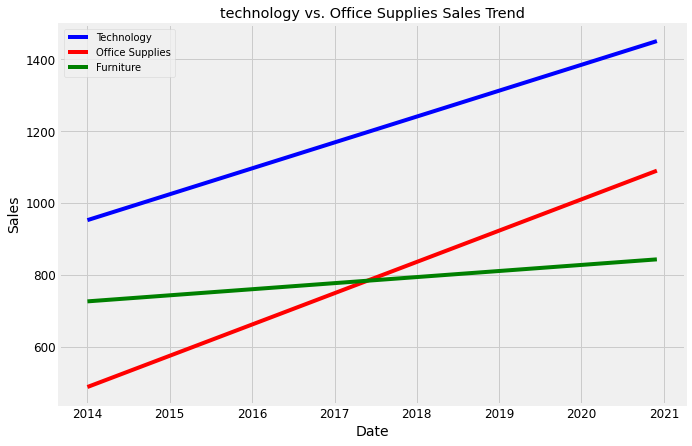

In [14]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['technology_trend'], 'b-', label='Technology')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-', label='Office Supplies')
plt.plot(forecast['Date'], forecast['furniture_trend'], 'g-', label='Furniture')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('technology vs. Office Supplies Sales Trend');

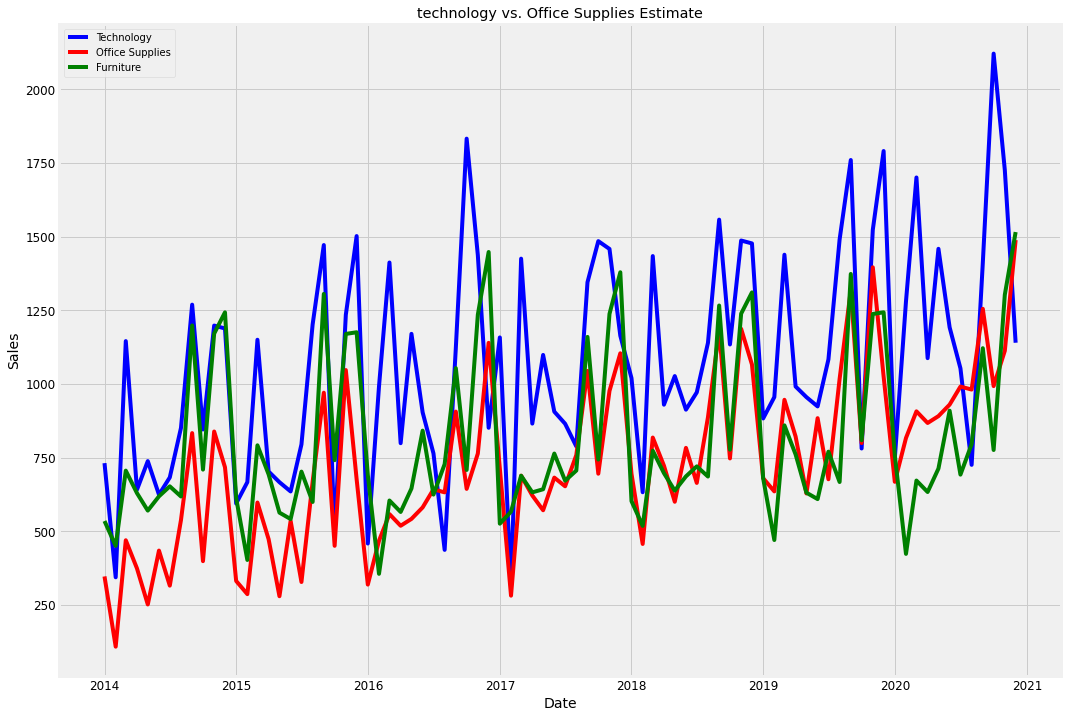

In [15]:
plt.figure(figsize=(16, 12))
plt.plot(forecast['Date'], forecast['technology_yhat'], 'b-', label='Technology')
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-', label='Office Supplies')
plt.plot(forecast['Date'], forecast['furniture_yhat'], 'g-', label='Furniture')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('technology vs. Office Supplies Estimate');

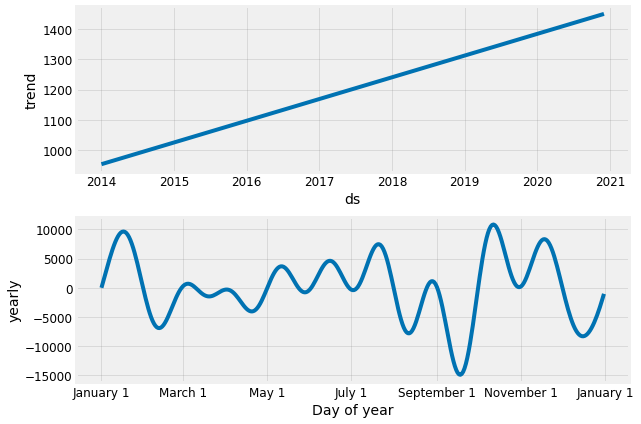

In [16]:
technology_model.plot_components(technology_forecast);

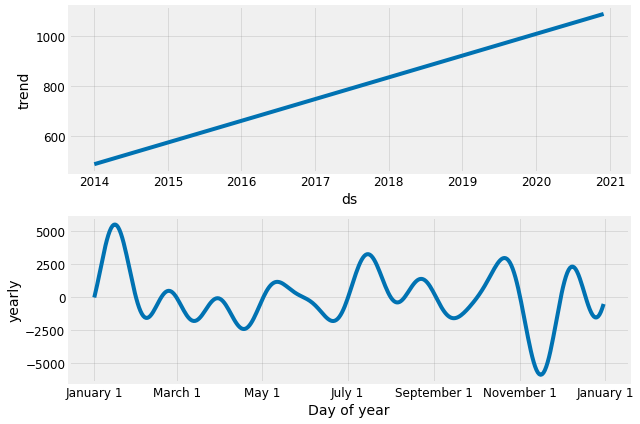

In [17]:
office_model.plot_components(office_forecast);

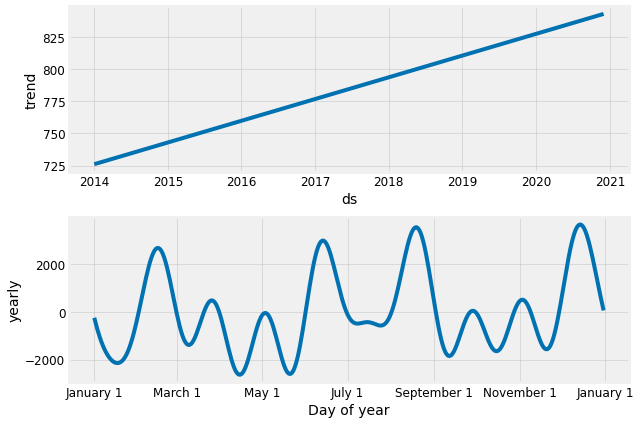

In [18]:
furniture_model.plot_components(furniture_forecast);

In [19]:
future_technology = technology_model.make_future_dataframe(periods=365)

In [20]:
forecast_technology = technology_model.predict(future_technology)

In [21]:
forecast_technology

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,952.355848,181.049040,1271.730691,952.355848,952.355848,-220.575922,-220.575922,-220.575922,-220.575922,-220.575922,-220.575922,0.0,0.0,0.0,731.779926
1,2014-02-01,958.476983,-245.955317,873.177822,958.476983,958.476983,-613.862112,-613.862112,-613.862112,-613.862112,-613.862112,-613.862112,0.0,0.0,0.0,344.614871
2,2014-03-01,964.005750,596.820695,1676.692460,964.005750,964.005750,181.810553,181.810553,181.810553,181.810553,181.810553,181.810553,0.0,0.0,0.0,1145.816303
3,2014-04-01,970.126885,102.915004,1224.875345,970.126885,970.126885,-328.523260,-328.523260,-328.523260,-328.523260,-328.523260,-328.523260,0.0,0.0,0.0,641.603626
4,2014-05-01,976.050565,176.300779,1282.669731,976.050565,976.050565,-237.352937,-237.352937,-237.352937,-237.352937,-237.352937,-237.352937,0.0,0.0,0.0,738.697628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2018-11-27,1305.999612,4701.895946,5756.829250,1305.999577,1305.999649,3931.701690,3931.701690,3931.701690,3931.701690,3931.701690,3931.701690,0.0,0.0,0.0,5237.701302
409,2018-11-28,1306.197068,3809.873242,4911.868824,1306.197033,1306.197105,3031.192633,3031.192633,3031.192633,3031.192633,3031.192633,3031.192633,0.0,0.0,0.0,4337.389701
410,2018-11-29,1306.394524,2813.863295,3902.879660,1306.394489,1306.394561,2094.507374,2094.507374,2094.507374,2094.507374,2094.507374,2094.507374,0.0,0.0,0.0,3400.901897
411,2018-11-30,1306.591980,1880.115385,2939.203837,1306.591945,1306.592018,1136.145641,1136.145641,1136.145641,1136.145641,1136.145641,1136.145641,0.0,0.0,0.0,2442.737621


In [23]:
future_furniture = furniture_model.make_future_dataframe(periods=365)

In [27]:
forecast_furniture = furniture_model.predict(future_furniture)

In [28]:
forecast_furniture

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,726.057713,300.566284,779.839873,726.057713,726.057713,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,-190.685662,0.0,0.0,0.0,535.372051
1,2014-02-01,727.494023,218.863766,698.362959,727.494023,727.494023,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,-276.377703,0.0,0.0,0.0,451.116320
2,2014-03-01,728.791335,455.937347,933.590713,728.791335,728.791335,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,-22.389755,0.0,0.0,0.0,706.401580
3,2014-04-01,730.227645,382.321202,870.867729,730.227645,730.227645,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,-100.141158,0.0,0.0,0.0,630.086487
4,2014-05-01,731.617622,323.204981,821.252587,731.617622,731.617622,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,-160.815662,0.0,0.0,0.0,570.801960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2018-11-27,809.039341,-141.228331,328.608772,809.039324,809.039358,-712.725831,-712.725831,-712.725831,-712.725831,-712.725831,-712.725831,0.0,0.0,0.0,96.313509
409,2018-11-28,809.085673,115.749859,585.170001,809.085657,809.085690,-444.196773,-444.196773,-444.196773,-444.196773,-444.196773,-444.196773,0.0,0.0,0.0,364.888900
410,2018-11-29,809.132006,414.585013,895.022464,809.131989,809.132023,-148.718134,-148.718134,-148.718134,-148.718134,-148.718134,-148.718134,0.0,0.0,0.0,660.413872
411,2018-11-30,809.178338,735.671126,1206.386764,809.178322,809.178355,168.539285,168.539285,168.539285,168.539285,168.539285,168.539285,0.0,0.0,0.0,977.717623


In [26]:
future_office = office_model.make_future_dataframe(periods=365)

In [29]:
forecast_office = office_model.predict(future_office)

In [30]:
forecast_office

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,487.530759,50.580241,642.868582,487.530759,487.530759,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,494.918445,-189.992672,408.065369,494.918445,494.918445,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,501.591193,146.158088,785.118443,501.591193,501.591193,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,508.978878,75.166627,690.210821,508.978878,508.978878,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,516.128251,-68.191329,570.573396,516.128251,516.128251,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2018-11-27,914.698078,-1458.119746,-865.832380,914.677857,914.718644,-2077.191169,-2077.191169,-2077.191169,-2077.191169,-2077.191169,-2077.191169,0.0,0.0,0.0,-1162.493091
409,2018-11-28,914.936736,-900.505956,-290.728261,914.916391,914.957377,-1498.618715,-1498.618715,-1498.618715,-1498.618715,-1498.618715,-1498.618715,0.0,0.0,0.0,-583.681980
410,2018-11-29,915.175393,-323.211668,292.372513,915.154966,915.196110,-926.847836,-926.847836,-926.847836,-926.847836,-926.847836,-926.847836,0.0,0.0,0.0,-11.672443
411,2018-11-30,915.414051,236.557542,850.536890,915.393542,915.434843,-373.400023,-373.400023,-373.400023,-373.400023,-373.400023,-373.400023,0.0,0.0,0.0,542.014028


In [35]:
from prophet.diagnostics import cross_validation
technology_cv = cross_validation(technology_model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2016-06-04 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.1571
Iteration  1. Log joint probability =    21.3923. Improved by 68.5493.
Iteration  2. Log joint probability =    24.1826. Improved by 2.79035.
Iteration  3. Log joint probability =    34.0036. Improved by 9.82096.
Iteration  4. Log joint probability =    41.8564. Improved by 7.85279.
Iteration  5. Log joint probability =    48.9897. Improved by 7.13331.
Iteration  6. Log joint probability =    49.4955. Improved by 0.505825.
Iteration  7. Log joint probability =    49.5549. Improved by 0.0593805.
Iteration  8. Log joint probability =    49.5823. Improved by 0.027373.
Iteration  9. Log joint probability =    49.7268. Improved by 0.14457.
Iteration 10. Log joint probability =    49.7626. Improved by 0.0357105.
Iteration 11. Log joint probability =    49.8306. Improved by 0.0680464.
Iteration 12. Log joint probability =    49.9005. Improved by 0.0698741.
Iteration 13. Log joint probability =    49.9167. Improved by 0.0161937.
Iteration 14. Log joint

In [37]:
from prophet.diagnostics import performance_metrics
technology_performance = performance_metrics(technology_cv)

In [38]:
technology_performance.mean()

horizon     203 days 14:36:31.304347826
mse                       631328.333042
rmse                          663.29798
mae                          537.682807
mape                           0.631808
mdape                          0.631808
smape                          0.586945
coverage                       0.630435
dtype: object

In [39]:
furniture_cv = cross_validation(furniture_model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2016-06-04 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -46.921
Iteration  1. Log joint probability =    16.4993. Improved by 63.4203.
Iteration  2. Log joint probability =    42.1087. Improved by 25.6094.
Iteration  3. Log joint probability =    55.5104. Improved by 13.4017.
Iteration  4. Log joint probability =    58.2234. Improved by 2.71296.
Iteration  5. Log joint probability =    64.9494. Improved by 6.72597.
Iteration  6. Log joint probability =    66.0189. Improved by 1.06954.
Iteration  7. Log joint probability =    66.0513. Improved by 0.0324322.
Iteration  8. Log joint probability =    66.0558. Improved by 0.00443645.
Iteration  9. Log joint probability =    66.0738. Improved by 0.0180517.
Iteration 10. Log joint probability =    66.2174. Improved by 0.143601.
Iteration 11. Log joint probability =    66.2504. Improved by 0.0329843.
Iteration 12. Log joint probability =    66.4517. Improved by 0.201328.
Iteration 13. Log joint probability =    66.4788. Improved by 0.0270219.
Iteration 14. Log joint

In [40]:
furniture_performance = performance_metrics(furniture_cv)

In [41]:
furniture_performance.mean()

horizon     203 days 14:36:31.304347826
mse                        124539.53662
rmse                         291.110817
mae                           243.75262
mape                           0.345177
mdape                          0.345177
smape                           0.30703
coverage                       0.565217
dtype: object

In [42]:
office_cv = cross_validation(office_model, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2016-06-04 00:00:00 and 2016-12-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.3172
Iteration  1. Log joint probability =    21.0861. Improved by 68.4033.
Iteration  2. Log joint probability =    38.7949. Improved by 17.7088.
Iteration  3. Log joint probability =    44.1935. Improved by 5.39861.
Iteration  4. Log joint probability =    55.9576. Improved by 11.7641.
Iteration  5. Log joint probability =    59.5793. Improved by 3.62164.
Iteration  6. Log joint probability =    59.5803. Improved by 0.00102901.
Iteration  7. Log joint probability =    59.5947. Improved by 0.0143582.
Iteration  8. Log joint probability =    59.6751. Improved by 0.0804993.
Iteration  9. Log joint probability =    60.1578. Improved by 0.482633.
Iteration 10. Log joint probability =    60.1894. Improved by 0.0315823.
Iteration 11. Log joint probability =       60.2. Improved by 0.0106375.
Iteration 12. Log joint probability =    60.2651. Improved by 0.065052.
Iteration 13. Log joint probability =    60.2836. Improved by 0.018523.
Iteration 14. Log joi

Iteration 41. Log joint probability =    74.1272. Improved by 9.87754e-06.
Iteration 42. Log joint probability =    74.1272. Improved by 1.76366e-05.
Iteration 43. Log joint probability =    74.1272. Improved by 6.35485e-06.
Iteration 44. Log joint probability =    74.1272. Improved by 3.34223e-06.
Iteration 45. Log joint probability =    74.1272. Improved by 2.42554e-06.
Iteration 46. Log joint probability =    74.1272. Improved by 2.64201e-08.
Iteration 47. Log joint probability =    74.1272. Improved by 2.45268e-06.
Iteration 48. Log joint probability =    74.1273. Improved by 1.74768e-06.
Iteration 49. Log joint probability =    74.1273. Improved by 1.71263e-07.
Iteration 50. Log joint probability =    74.1273. Improved by 7.77963e-07.
Iteration 51. Log joint probability =    74.1273. Improved by 8.44087e-07.
Iteration 52. Log joint probability =    74.1273. Improved by 2.12677e-07.
Iteration 53. Log joint probability =    74.1273. Improved by 4.58407e-07.
Iteration 54. Log joint p

In [43]:
office_performance = performance_metrics(office_cv)

In [44]:
office_performance = performance_metrics(office_cv)

In [45]:
office_performance.mean()

horizon     203 days 14:36:31.304347826
mse                       183175.034191
rmse                          385.51399
mae                          338.247023
mape                           0.493391
mdape                          0.493391
smape                          0.705303
coverage                       0.369565
dtype: object